## Step 2 Notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir('/content/drive/MyDrive/DataIntelligenceApplications/')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from environments.BiddingEnvironment import *
from learners.GTS_Learner import *
from learners.GPTS_Learner import *
from data_generators.basic_generator import *

In [3]:
data_gen = BasicDataGenerator('src/basic003.json')

prices = data_gen.get_prices()
bids = data_gen.get_bids()
json_src = 'src/basic003.json'

aggr_cpc = data_gen.get_costs_per_click(mode='aggregate')
aggr_d_clicks = data_gen.get_daily_clicks(mode='aggregate')
aggr_conv_rates = data_gen.get_conversion_rates(mode='aggregate')
aggr_purch = data_gen.get_future_purchases(mode='aggregate')

In [4]:
n_arms = len(bids)

min_bid = min(bids)
max_bid = max(bids)

b = np.linspace(0.0, 1.0, n_arms) #for testinf use linspace for bids
sigma = 10

In [5]:
#P
print(f'prices = {prices}')
print(f'bids = {bids}')
#print(f'{aggr_cpc=}')
#print(f'{aggr_d_clicks=}')
#print(f'{aggr_conv_rates=}')
#print(f'{aggr_purch=}')

prices = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
bids = [0.3, 0.35, 0.4, 0.5, 0.6, 0.75, 0.9, 1.0, 1.25, 1.5]


In [6]:
T = 60
n_experiments = 50

gts_rewards_per_experiment = []
gpts_rewards_per_experiment = []

In [7]:
for e in range(0, n_experiments):
    print(f'experiment number = {e}')
    #env = BiddingEnvironment(bids = np.array(bids), sigma = sigma)
    env = BiddingEnvironment(sigma = sigma, src = json_src, mode = 'aggregate')
    gts_learner = GTS_Learner(n_arms = n_arms)
    gpts_learner = GPTS_Learner(arms = bids)
    for t in range(0, T):
        pulled_arm = gts_learner.pull_arm()
        reward = env.round(pulled_arm)
        gts_learner.update(pulled_arm, reward)
        
        pulled_arm = gpts_learner.pull_arm()
        reward = env.round(pulled_arm)
        if(e == 0):
            print('reward = ' + f'{reward}')
            
        gpts_learner.update(pulled_arm, reward)
        
    gts_rewards_per_experiment.append(gts_learner.collected_rewards)
    gpts_rewards_per_experiment.append(gpts_learner.daily_collected_rewards)

experiment number = 0
Environment created with fixed price: 19
arm = 7
reward = {'n_clicks': 545.2161710178401, 'cpc': 0.9767909262383381, 'margin': 7, 'tau': 1.554, 'conv_rates': 0.187}
arm = 3
reward = {'n_clicks': 459.391732980409, 'cpc': 0.48877616674950203, 'margin': 7, 'tau': 1.656, 'conv_rates': 0.195}
arm = 7
reward = {'n_clicks': 553.0045077152012, 'cpc': 0.9465412367117166, 'margin': 7, 'tau': 1.554, 'conv_rates': 0.187}
arm = 8
reward = {'n_clicks': 567.2993317792797, 'cpc': 1.1730747581438676, 'margin': 7, 'tau': 1.53, 'conv_rates': 0.185}
arm = 2
reward = {'n_clicks': 420.65110979916744, 'cpc': 0.3902956041852169, 'margin': 7, 'tau': 1.693, 'conv_rates': 0.198}
arm = 3
reward = {'n_clicks': 456.41787253573153, 'cpc': 0.486643418448029, 'margin': 7, 'tau': 1.656, 'conv_rates': 0.195}
arm = 6
reward = {'n_clicks': 531.7210739316918, 'cpc': 0.8608297482979225, 'margin': 7, 'tau': 1.567, 'conv_rates': 0.188}
arm = 0
reward = {'n_clicks': 378.8064503365101, 'cpc': 0.29795375542

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


experiment number = 28
Environment created with fixed price: 19
arm = 9
arm = 5
arm = 6
arm = 8
arm = 2
arm = 4
arm = 1
arm = 7
arm = 9
arm = 8
experiment number = 29
Environment created with fixed price: 19
arm = 2
arm = 5
arm = 6
arm = 3
arm = 3
arm = 7
arm = 6
arm = 0
arm = 8
arm = 2
experiment number = 30
Environment created with fixed price: 19
arm = 1
arm = 3
arm = 5
arm = 0
arm = 5
arm = 9
arm = 2
arm = 7
arm = 5
arm = 6
experiment number = 31
Environment created with fixed price: 19
arm = 7
arm = 7
arm = 2
arm = 8
arm = 1
arm = 2
arm = 1
arm = 3
arm = 9
arm = 8
experiment number = 32
Environment created with fixed price: 19
arm = 7
arm = 1
arm = 4
arm = 1
arm = 4
arm = 4
arm = 2
arm = 1
arm = 3
arm = 3
experiment number = 33
Environment created with fixed price: 19
arm = 2
arm = 2
arm = 3
arm = 5
arm = 7
arm = 6
arm = 6
arm = 2
arm = 1
arm = 0
experiment number = 34
Environment created with fixed price: 19
arm = 5
arm = 5
arm = 7
arm = 3
arm = 4
arm = 1
arm = 3
arm = 9
arm = 6


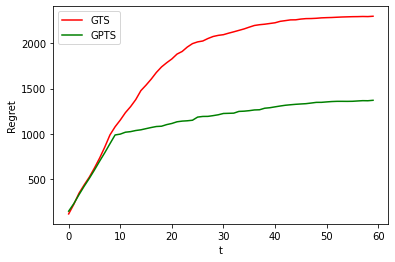

In [8]:
#opt = np.max(env.means)
opt = env.get_opt()


plt.figure(0)
plt.ylabel("Regret")
plt.xlabel("t")
plt.plot(np.cumsum(np.mean(opt - gts_rewards_per_experiment, axis=0)), 'r')
plt.plot(np.cumsum(np.mean(opt - gpts_rewards_per_experiment, axis=0)), 'g')
plt.legend(['GTS', 'GPTS'])
plt.show()

In [ ]:
env.get_opt_arm()

4

In [ ]:
env.get_opt()

1144.2221619199997

In [ ]:
env.expected_rew()

array([ 999.9465896 , 1048.6953408 , 1084.4434928 , 1127.2224586 ,
       1144.22216192, 1140.00288204, 1113.64022616, 1087.93850044,
       1005.49842068,  907.77266396])